# Import Library

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 1.) Data Collecting

In [2]:
# Load Dataset
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,NaN,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# 2.) Data Analysis

In [3]:
# Shape of Data
df.shape

(2126, 22)

In [4]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    1914 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                1914 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
# Data Description
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,1914.000000,1914.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004372,0.001889,0.000003,0.000158,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.477011,134.610536,138.090310,19.020899,0.319749,1.304327
std,9.840844,0.003866,0.046666,0.002953,0.002960,0.000057,0.000592,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.434563,15.593596,14.466589,29.628676,0.610208,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### Unique Value

In [6]:
# histogram_number_of_peaks
cols = ['histogram_number_of_peaks']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

histogram_number_of_peaks has [ 2.  6.  5. 11.  9.  0.  1.  7.  3. 13. 10.  8.  4. 12. 14. 15. 16. 18.] values



In [7]:
# histogram_number_of_zeroes
cols = ['histogram_number_of_zeroes']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

histogram_number_of_zeroes has [ 0.  1.  3.  2.  4. 10.  5.  8.  7.] values



In [8]:
# histogram_mode
cols = ['histogram_mode']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

histogram_mode has [120.  nan 141. 137.  76. 122. 150. 135. 134. 143. 133. 129.  75. 126.
 128. 124. 123. 121. 125. 119. 117. 127. 116. 170. 151. 154. 149. 147.
 140. 142. 153. 162. 156. 144. 146. 152. 148. 145. 167. 165. 161. 131.
 132. 139. 114. 163. 159. 138. 136. 158. 157. 186. 187. 180. 176. 115.
 160.  90. 108.  97. 130. 155. 107. 112. 109. 110. 169.  99.  86. 106.
 113. 111.  98.  95.  91.  88. 164.  89. 179. 105.  67.  60. 100.  93.
  77. 103. 104.  69.] values



In [9]:
# histogram_tendency
cols = ['histogram_tendency']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

histogram_tendency has [ 1.  0. nan -1.] values



In [10]:
# fetal_health
cols = ['fetal_health']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

fetal_health has [2. 1. 3.] values



In [11]:
# Frequency of target variable
fetal_health_counts = df['fetal_health'].value_counts()
fetal_health_counts.index = fetal_health_counts.index.map({1.0: 'Normal', 2.0: 'Suspect', 3.0: 'Pathological'})
print(fetal_health_counts)

Normal          1655
Suspect          295
Pathological     176
Name: fetal_health, dtype: int64


Text(0.5, 1.0, 'Fetal Health Frequencies')

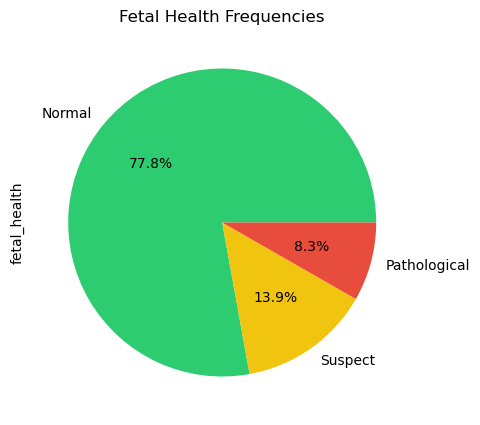

In [12]:
# Pie Chart of target variable
fetal_health_counts.plot.pie(autopct='%1.1f%%', figsize=(5,5), colors=['#2ecc71', '#f1c40f', '#e74c3c'])
plt.title('Fetal Health Frequencies')

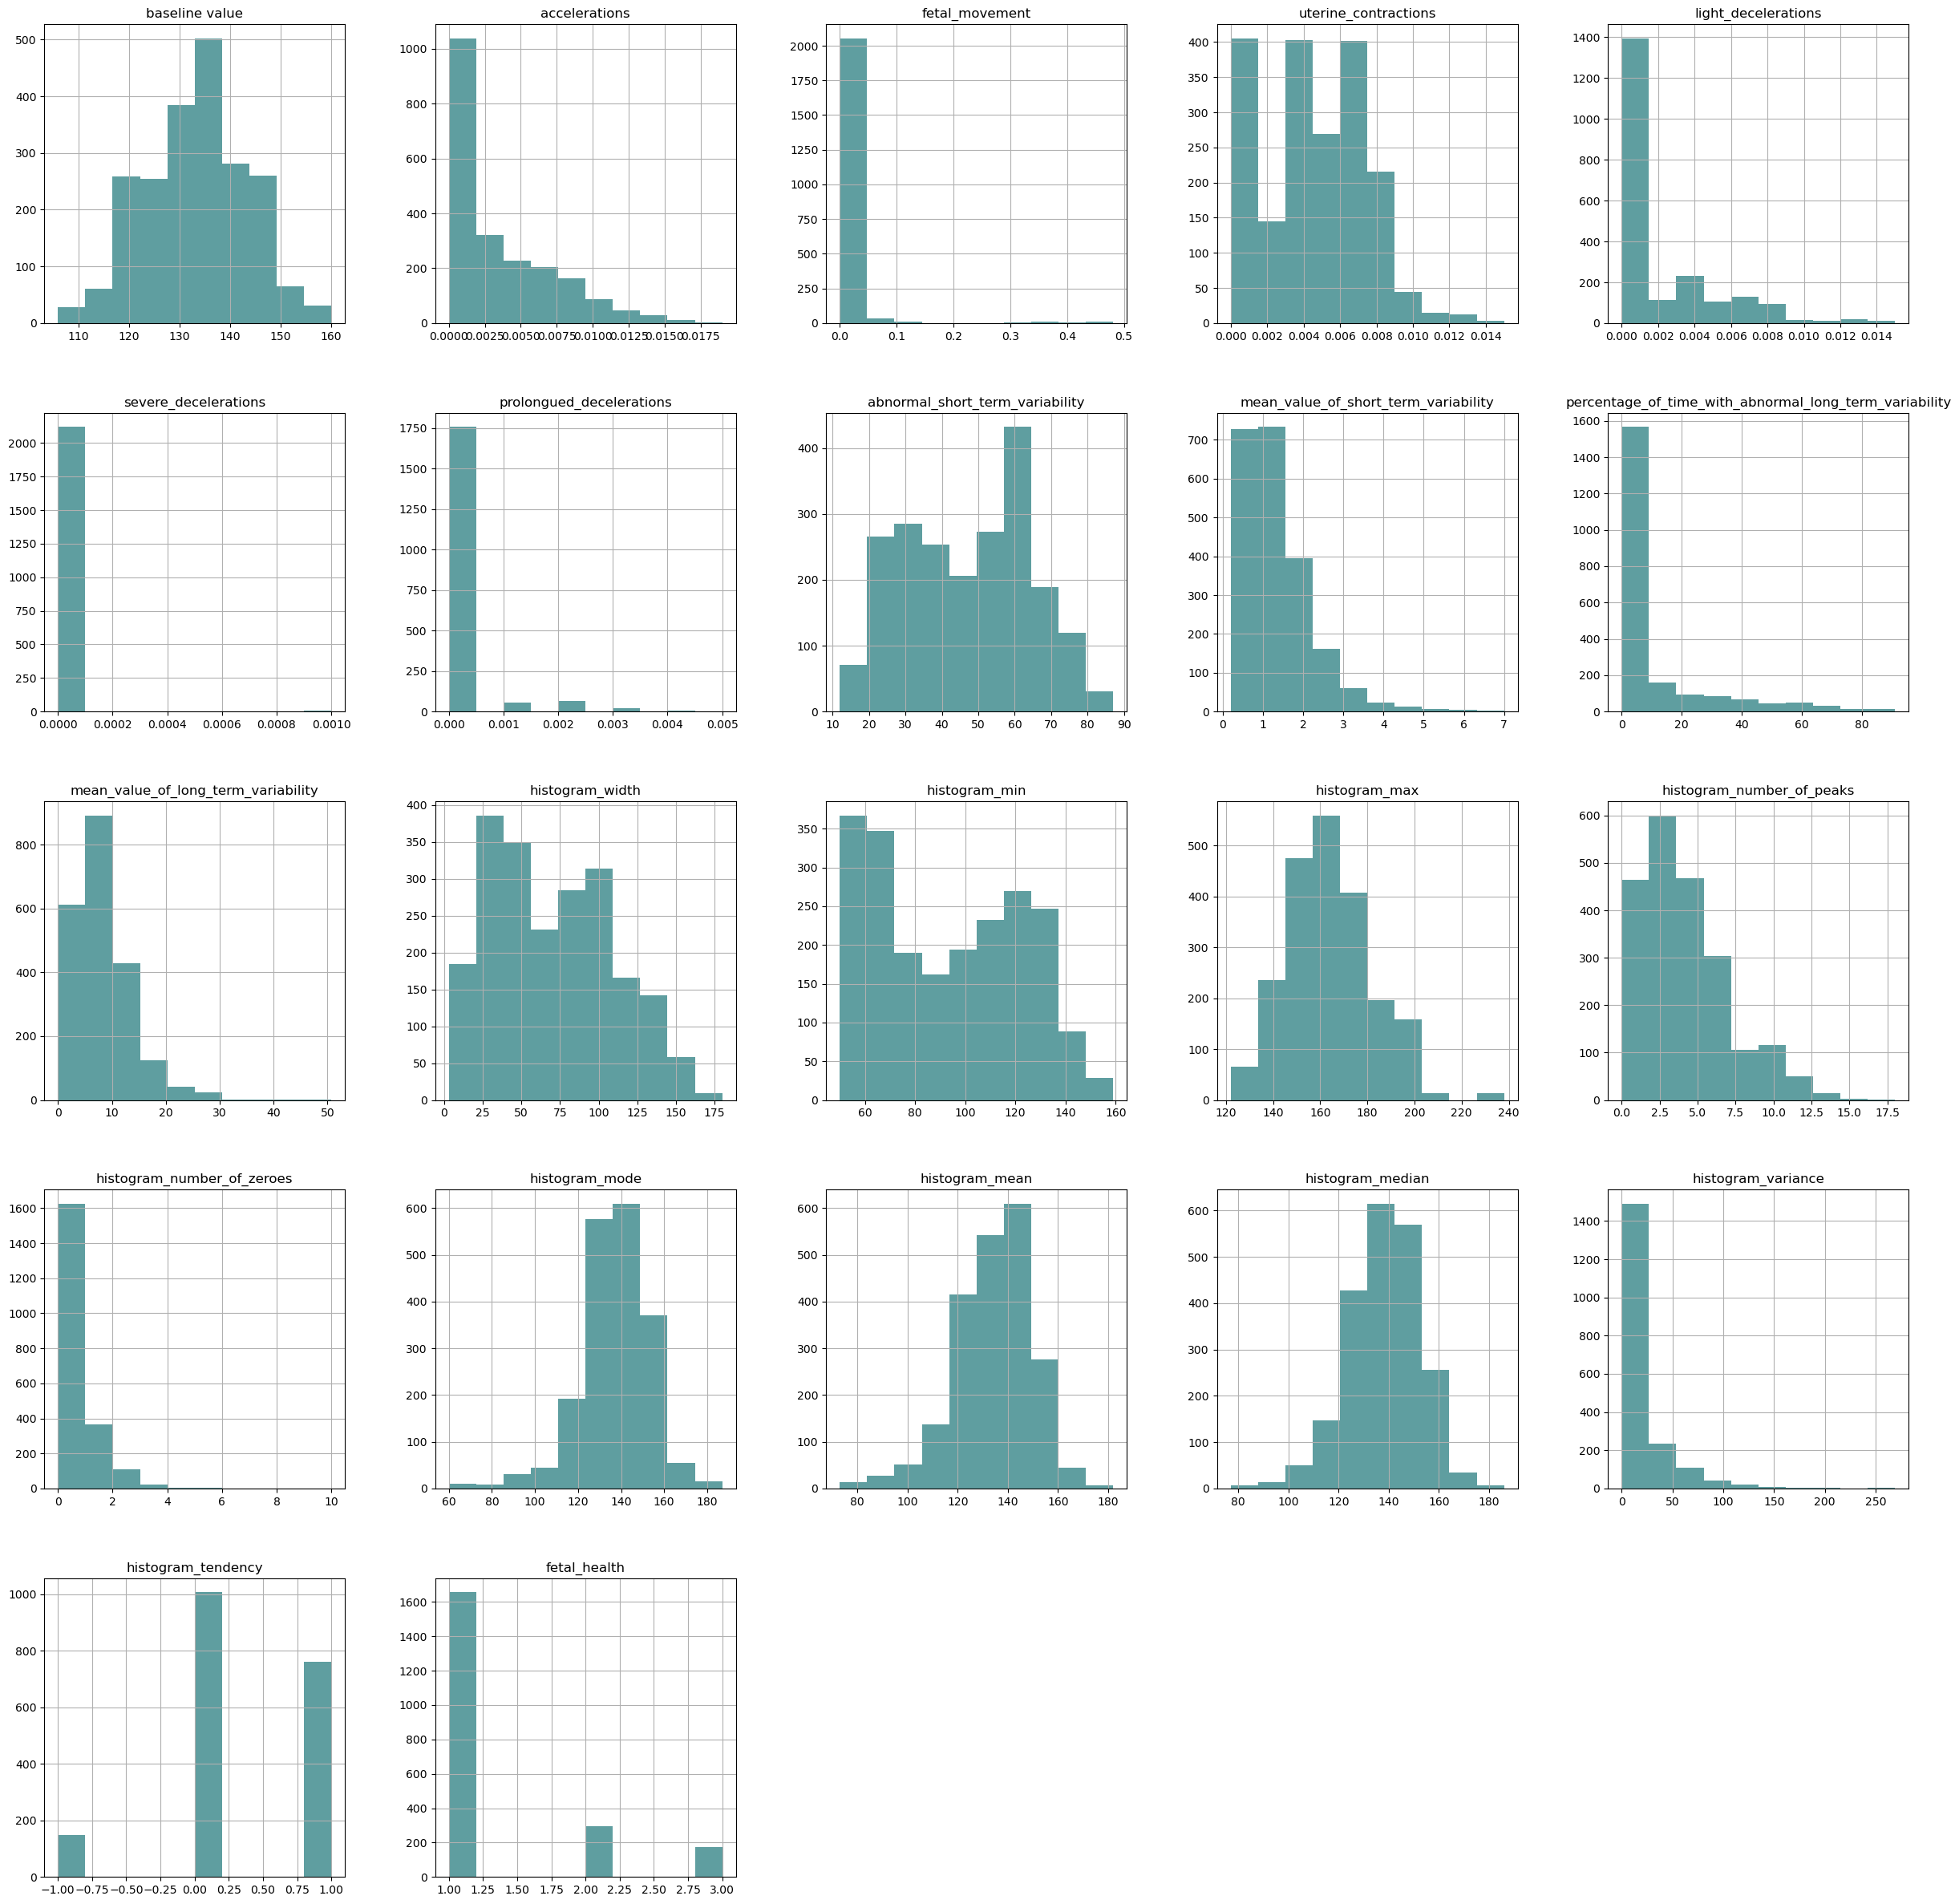

In [13]:
# Histogram Graph of Data Distribution in Each Feature
data_hist_plot = df.hist(figsize=(30,30), color = "#5F9EA0")

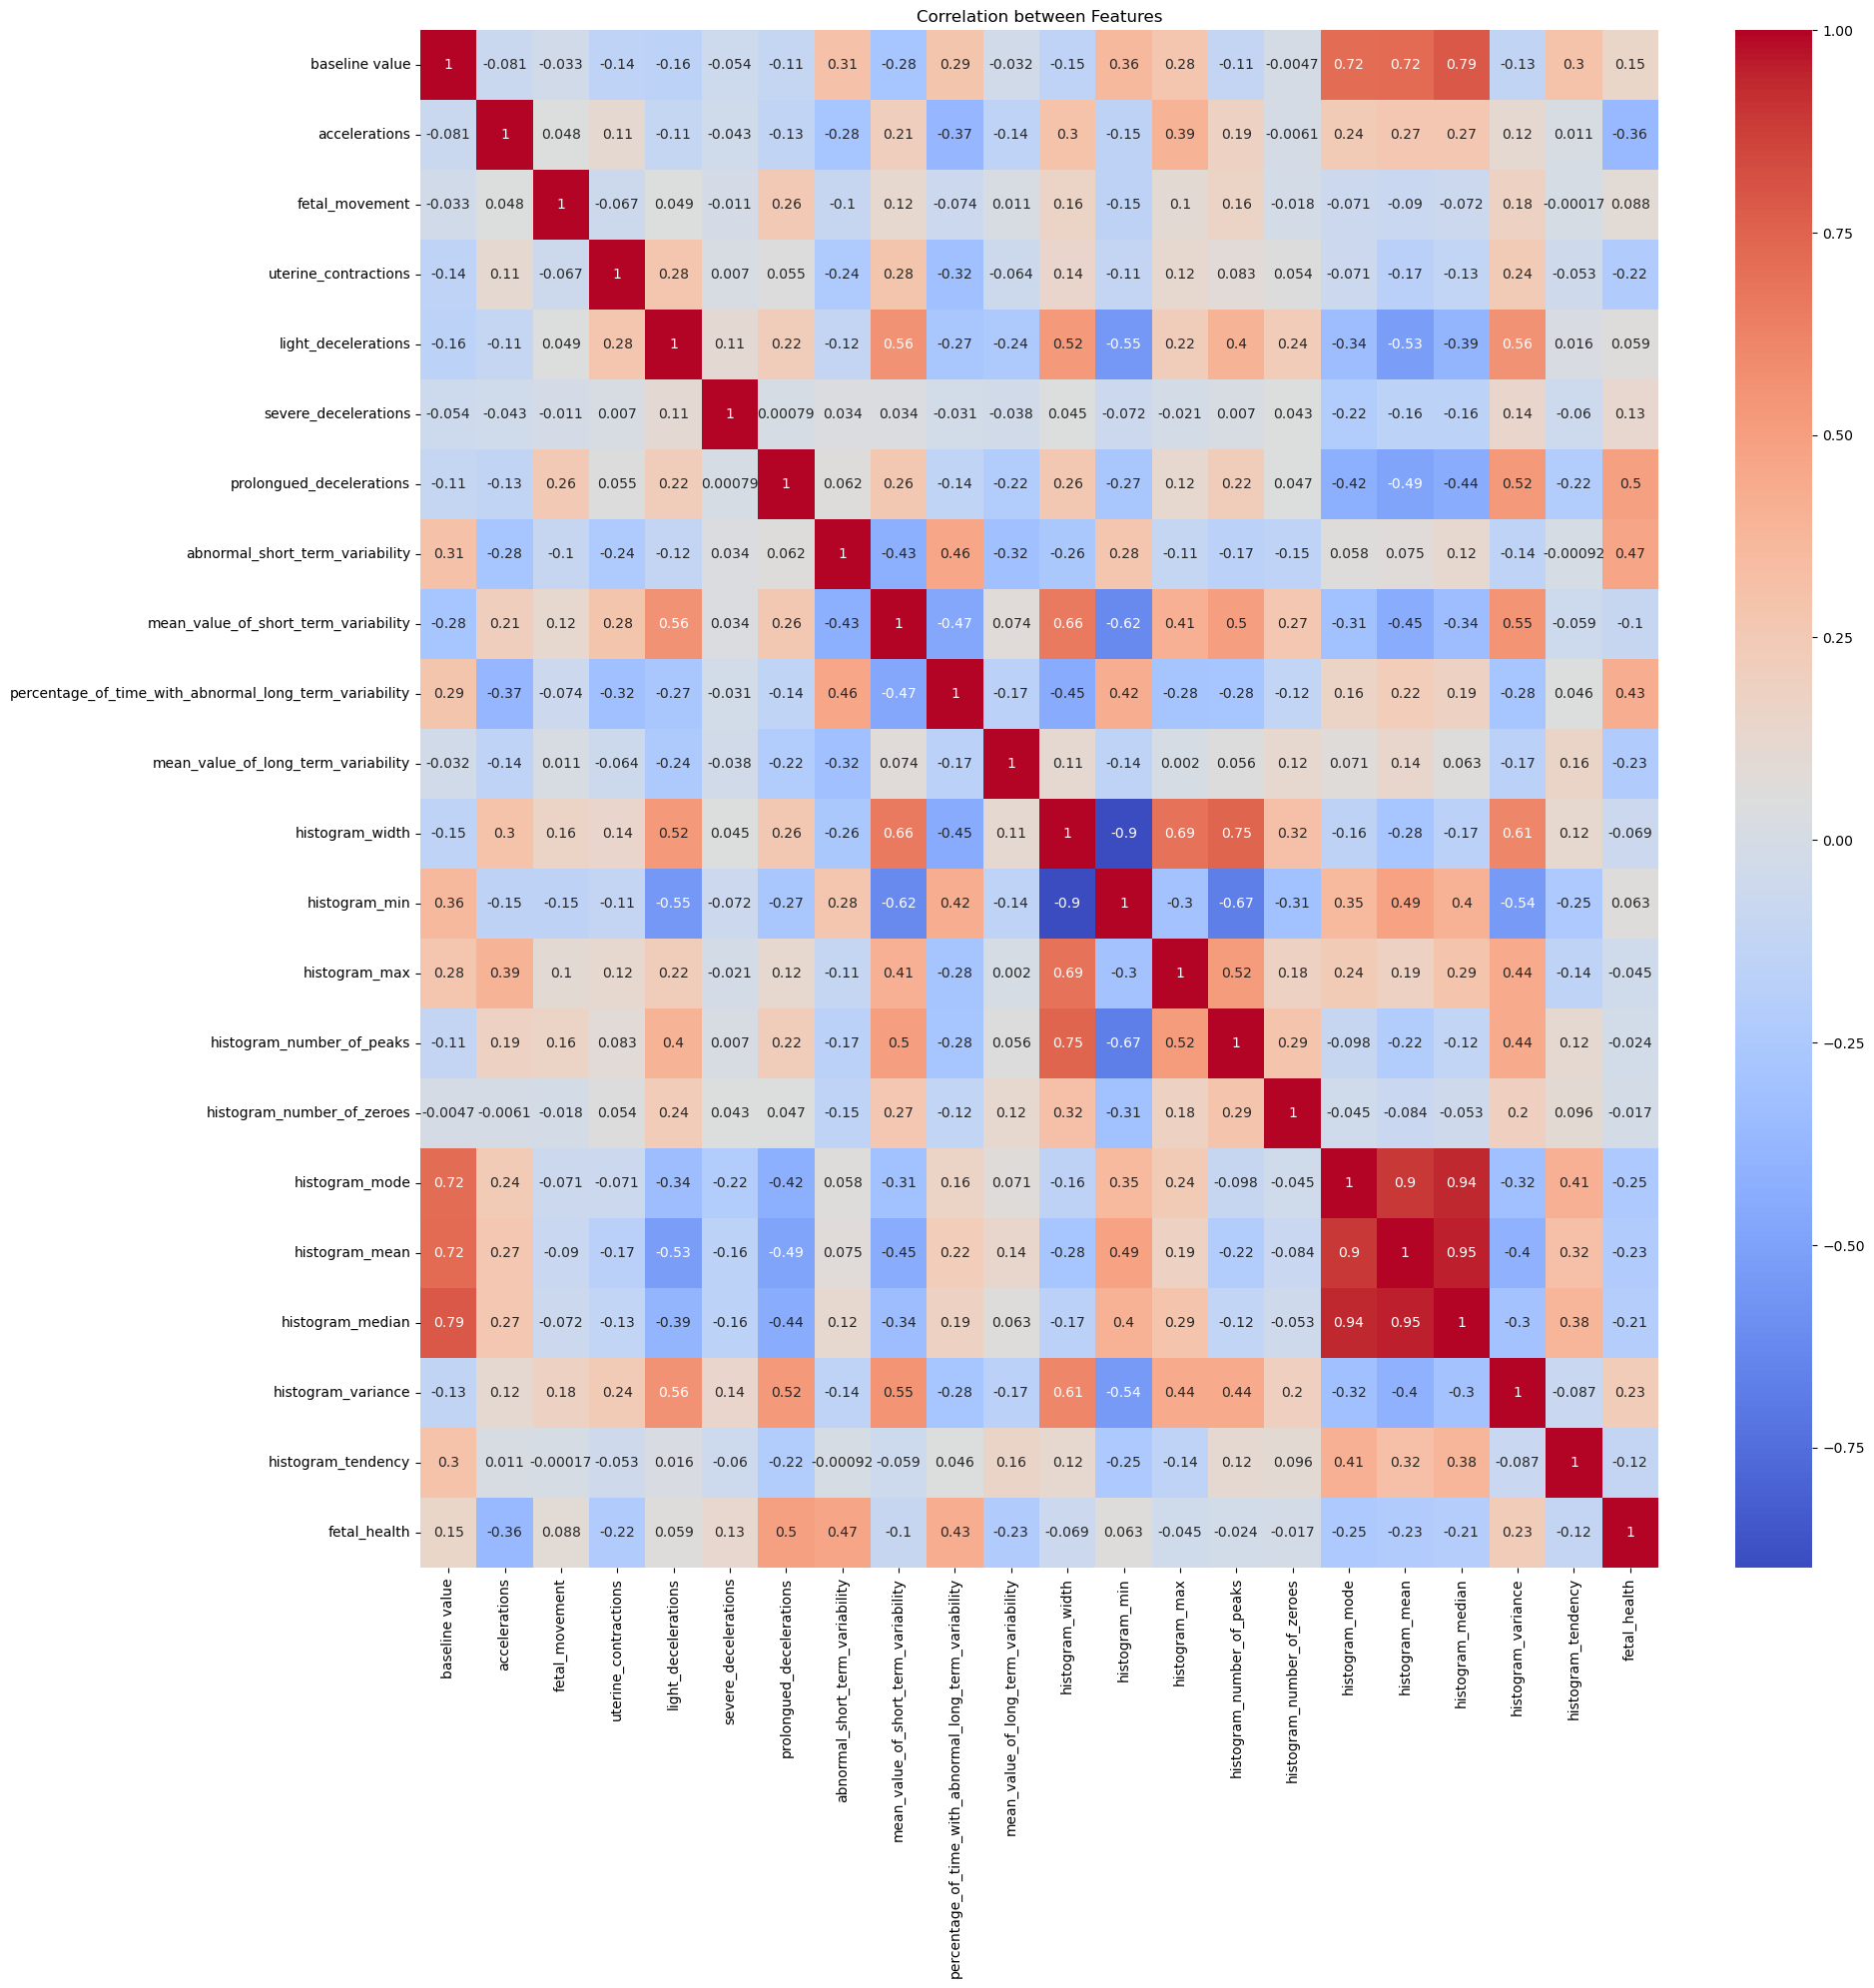

In [14]:
# Heatmap Correlation
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Features")
plt.show()

# 3.) Data Validation


In [15]:
# Missing Values
df.isnull().sum()

baseline value                                              0
accelerations                                               0
fetal_movement                                              0
uterine_contractions                                      212
light_decelerations                                         0
severe_decelerations                                        0
prolongued_decelerations                                  212
abnormal_short_term_variability                             0
mean_value_of_short_term_variability                        0
percentage_of_time_with_abnormal_long_term_variability      0
mean_value_of_long_term_variability                         0
histogram_width                                             0
histogram_min                                               0
histogram_max                                               0
histogram_number_of_peaks                                   0
histogram_number_of_zeroes                                  0
histogra

In [16]:
# Columns with Missing Values
df.loc[:, df.isnull().any()].columns

Index(['uterine_contractions', 'prolongued_decelerations', 'histogram_mode',
       'histogram_variance', 'histogram_tendency'],
      dtype='object')

In [17]:
# Data Duplicated
df.duplicated().sort_values(ascending = False)

234      True
1458     True
1113     True
306      True
68       True
        ...  
705     False
704     False
703     False
702     False
2125    False
Length: 2126, dtype: bool

In [18]:
# Data Duplicated Count
df.duplicated().sum()

5

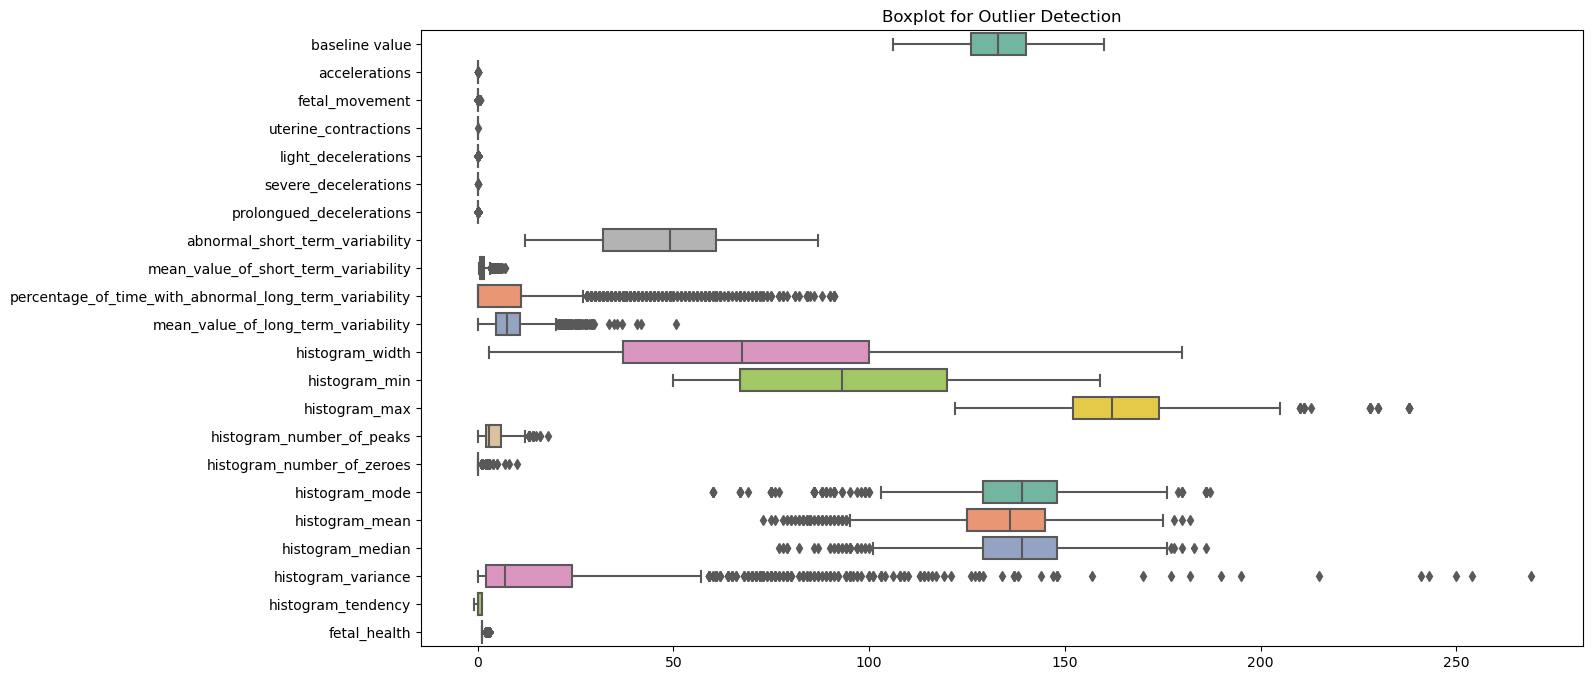

In [19]:
# Outliers Boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title('Boxplot for Outlier Detection')
plt.show()

# 4.) Object Determining

In [20]:
# Define Fiture and Target
feature_columns = ['baseline value','accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations',
            'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability',
            'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
            'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']
X = df[feature_columns]
y = df['fetal_health']

print("Fitur (X):", X.shape)
print("Target (y):", y.shape)

Fitur (X): (2126, 21)
Target (y): (2126,)


# 5.) Data Cleaning

### Handling Missing Value

In [21]:
# Handling Missing Value
columns_with_missing = ['uterine_contractions', 'prolongued_decelerations', 'histogram_mode', 'histogram_variance', 'histogram_tendency']

for col in columns_with_missing:
    df[col].fillna(df[col].mean(), inplace=True)

df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [22]:
# Handling Data Duplicated
df.drop_duplicates(keep='first', inplace=True)

df.duplicated().sum()

0

In [23]:
# Handling Outliers
data_iqr = df.copy()

for col in df.select_dtypes(include=['float64']).columns:
    if col != 'fetal_health':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data_iqr[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
        print(f"Outliers in '{col}' column have been handled using the IQR method.")


Outliers in 'baseline value' column have been handled using the IQR method.
Outliers in 'accelerations' column have been handled using the IQR method.
Outliers in 'fetal_movement' column have been handled using the IQR method.
Outliers in 'uterine_contractions' column have been handled using the IQR method.
Outliers in 'light_decelerations' column have been handled using the IQR method.
Outliers in 'severe_decelerations' column have been handled using the IQR method.
Outliers in 'prolongued_decelerations' column have been handled using the IQR method.
Outliers in 'abnormal_short_term_variability' column have been handled using the IQR method.
Outliers in 'mean_value_of_short_term_variability' column have been handled using the IQR method.
Outliers in 'percentage_of_time_with_abnormal_long_term_variability' column have been handled using the IQR method.
Outliers in 'mean_value_of_long_term_variability' column have been handled using the IQR method.
Outliers in 'histogram_width' column h

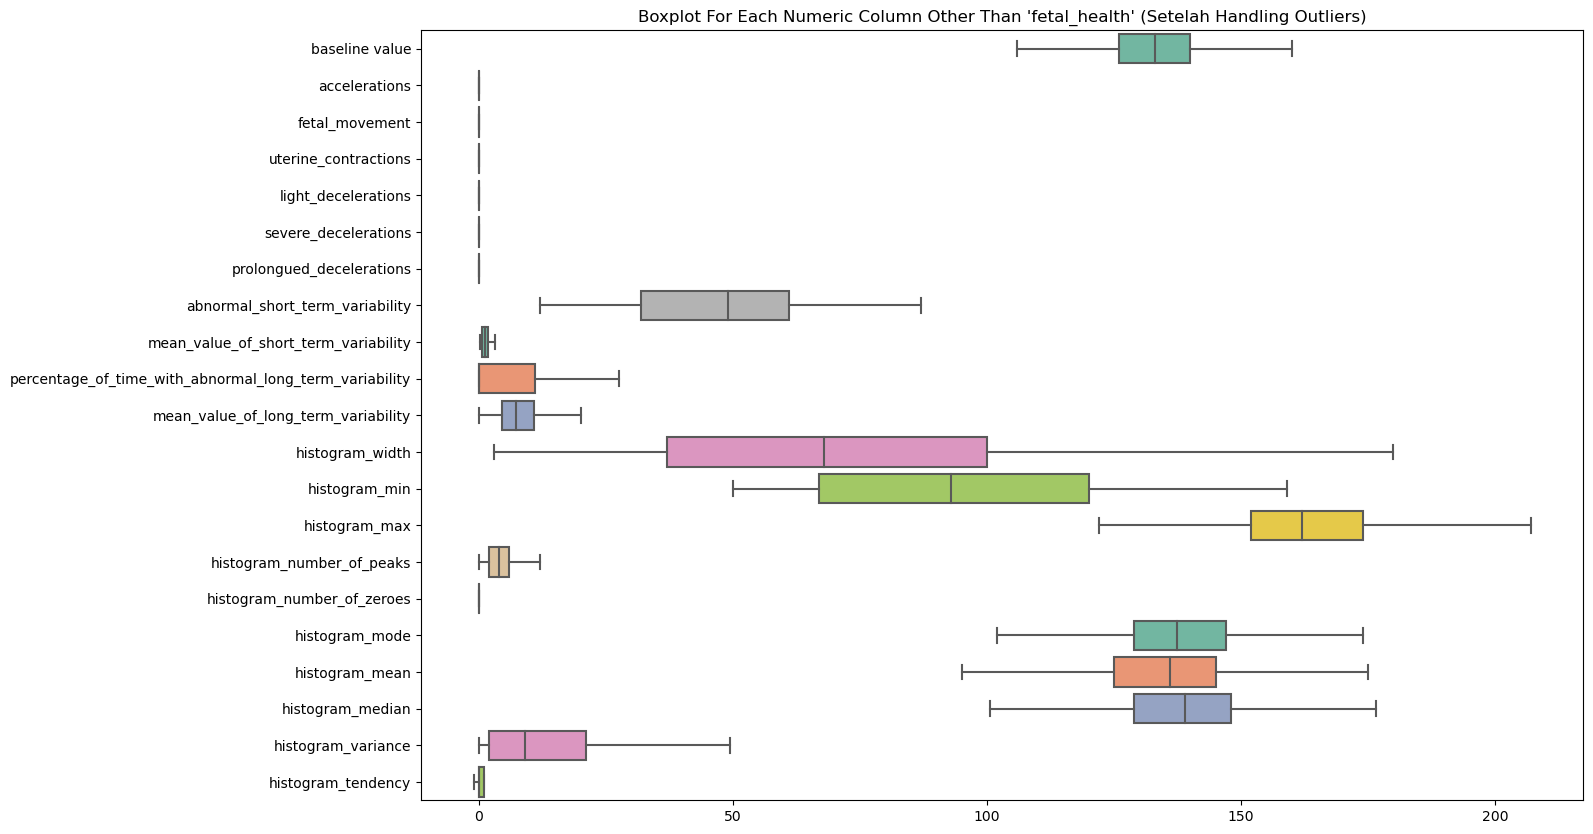

In [24]:
# Select only numeric columns other than the target column 
numerical_cols = data_iqr.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols[numerical_cols != 'fetal_health']  # Menghapus kolom 'fetal_health'

# Create a boxplot for each numeric column other than 'fetal_health'
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_iqr[numerical_cols], orient='h', palette="Set2")
plt.title("Boxplot For Each Numeric Column Other Than 'fetal_health' (Setelah Handling Outliers)")
plt.show()

# 6.) Feature Engineering

### Handling Imbalance Data

In [25]:
# Unique Values in Target Column
data_iqr['fetal_health'].value_counts()

1.0    1651
2.0     294
3.0     176
Name: fetal_health, dtype: int64

In [26]:
# Split Feature Column and Target Column
X = data_iqr.drop("fetal_health",axis=1)
y = data_iqr['fetal_health']

In [27]:
# Split for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [28]:
# Oversampling using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [29]:
# Clacc Distribution
"Class Distribution After Oversampling:", Counter(y_over)

('Class Distribution After Oversampling:',
 Counter({3.0: 1155, 1.0: 1155, 2.0: 1155}))

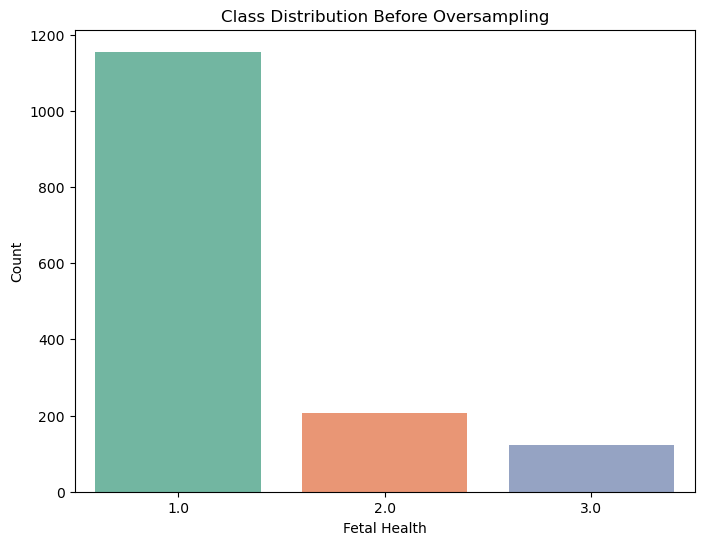

In [30]:
# Visualization Before Oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette="Set2")
plt.title("Class Distribution Before Oversampling")
plt.xlabel("Fetal Health")
plt.ylabel("Count")
plt.show()

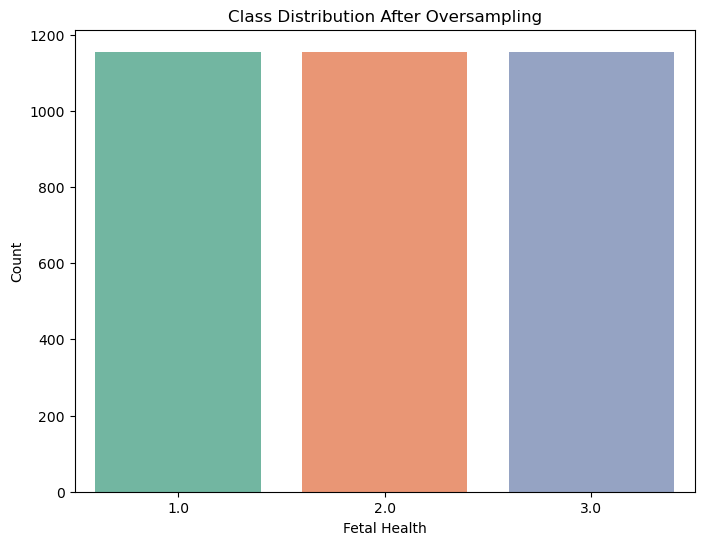

In [31]:
# Visualization After Oversampling
oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_over, y_over = oversample.fit_resample(X_train, y_train)

plt.figure(figsize=(8, 6))
sns.countplot(x=y_over, palette="Set2")
plt.title("Class Distribution After Oversampling")
plt.xlabel("Fetal Health")
plt.ylabel("Count")
plt.show()

In [32]:
# Dataset After Oversampling
oversampled_df = pd.DataFrame(X_over, columns=data_iqr.drop("fetal_health", axis=1).columns)
oversampled_df['fetal_health'] = y_over
oversampled_df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,125.0,0.000,0.0075,0.000000,0.0000,0.0,0.0,68.0,0.3,27.5,...,120.0,128.0,0.0,0.0,125.0,125.0,126.0,0.000000,0.000000,3.0
1,143.0,0.006,0.0000,0.008000,0.0020,0.0,0.0,28.0,1.4,0.0,...,102.0,182.0,3.0,0.0,155.0,152.0,154.0,23.000000,0.000000,1.0
2,130.0,0.000,0.0000,0.004372,0.0070,0.0,0.0,37.0,1.8,0.0,...,58.0,148.0,4.0,0.0,127.0,121.0,126.0,21.000000,1.000000,1.0
3,129.0,0.000,0.0010,0.004372,0.0075,0.0,0.0,65.0,2.8,0.0,...,50.0,151.0,7.0,0.0,105.0,95.0,112.0,13.000000,0.319749,3.0
4,137.0,0.008,0.0010,0.005000,0.0030,0.0,0.0,58.0,1.6,0.0,...,69.0,178.0,5.0,0.0,148.0,143.0,151.0,49.500000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,133.0,0.000,0.0000,0.000000,0.0000,0.0,0.0,73.0,0.2,27.5,...,131.0,139.0,1.0,0.0,133.0,134.0,135.0,0.000000,0.000000,3.0
3461,130.0,0.000,0.0075,0.000000,0.0000,0.0,0.0,80.0,0.3,0.0,...,96.0,145.0,3.0,0.0,108.0,123.0,122.0,19.020899,0.319749,3.0
3462,123.0,0.000,0.0000,0.000000,0.0000,0.0,0.0,73.0,0.3,27.5,...,120.0,129.0,2.0,0.0,123.0,124.0,125.0,0.000000,0.000000,3.0
3463,133.0,0.000,0.0000,0.000000,0.0000,0.0,0.0,75.0,0.2,27.5,...,131.0,138.0,1.0,0.0,133.0,134.0,135.0,0.000000,0.000000,3.0


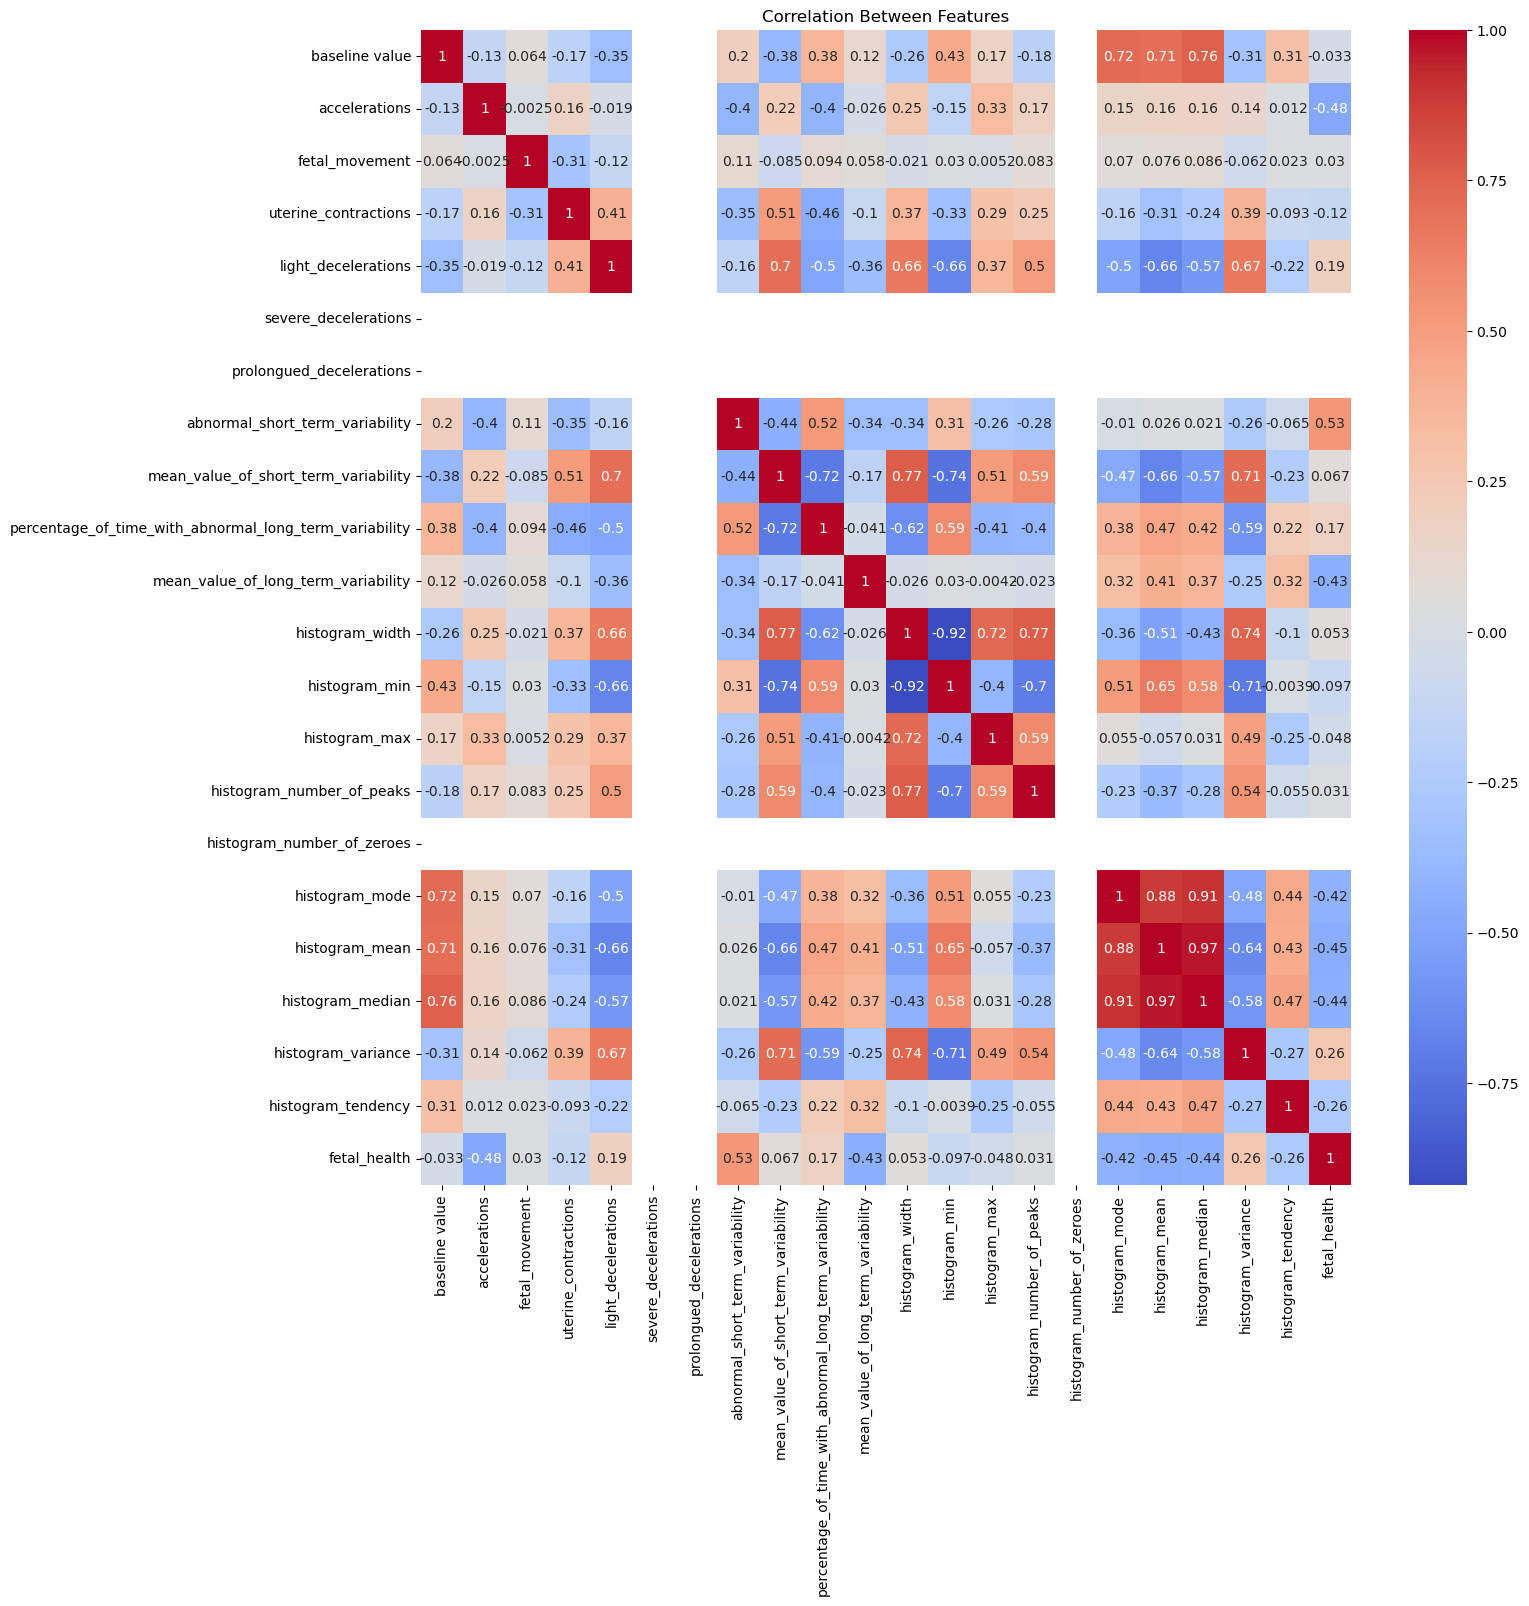

In [33]:
# Heatmap Correlation
plt.figure(figsize=(15, 15))
sns.heatmap(oversampled_df.corr(), annot=True, cmap="coolwarm")  # Korelasi antar fitur
plt.title("Correlation Between Features")
plt.show()

### Visualization

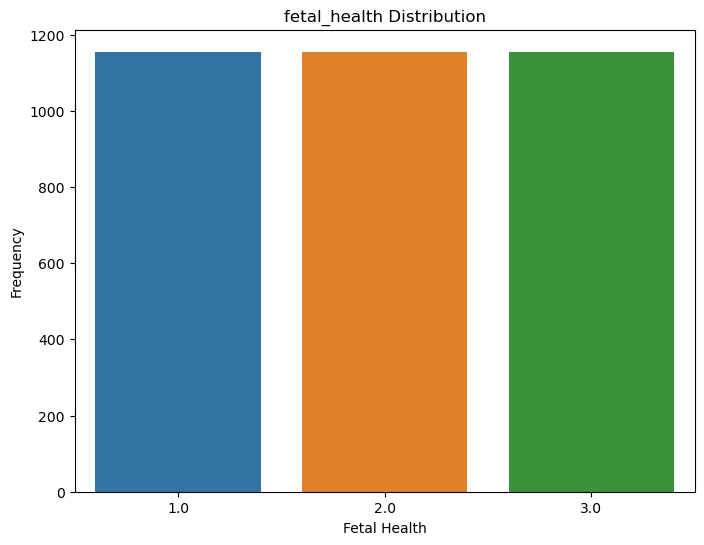

In [34]:
# 'fetal_health' Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(data=oversampled_df, x='fetal_health')
plt.title('fetal_health Distribution')
plt.xlabel('Fetal Health')
plt.ylabel('Frequency')
plt.show()

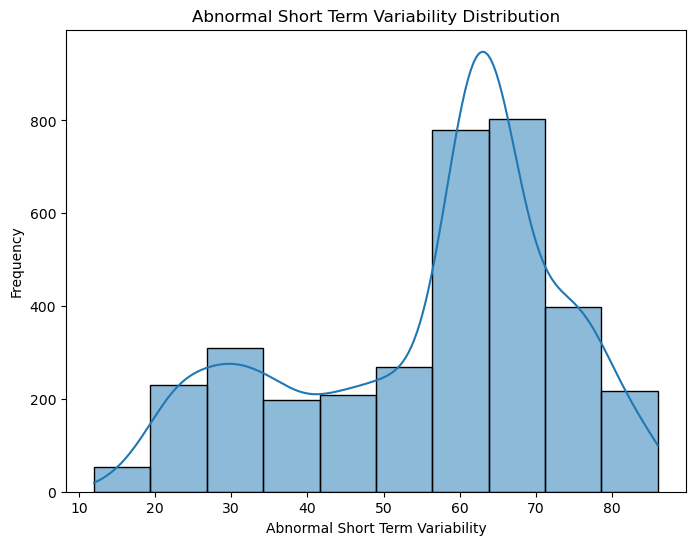

In [35]:
# 'abnormal_short_term_variability' Histogram
plt.figure(figsize=(8, 6)) 
sns.histplot(data=oversampled_df, x='abnormal_short_term_variability', bins=10, kde=True)
plt.title('Abnormal Short Term Variability Distribution')
plt.xlabel('Abnormal Short Term Variability')
plt.ylabel('Frequency')
plt.show()

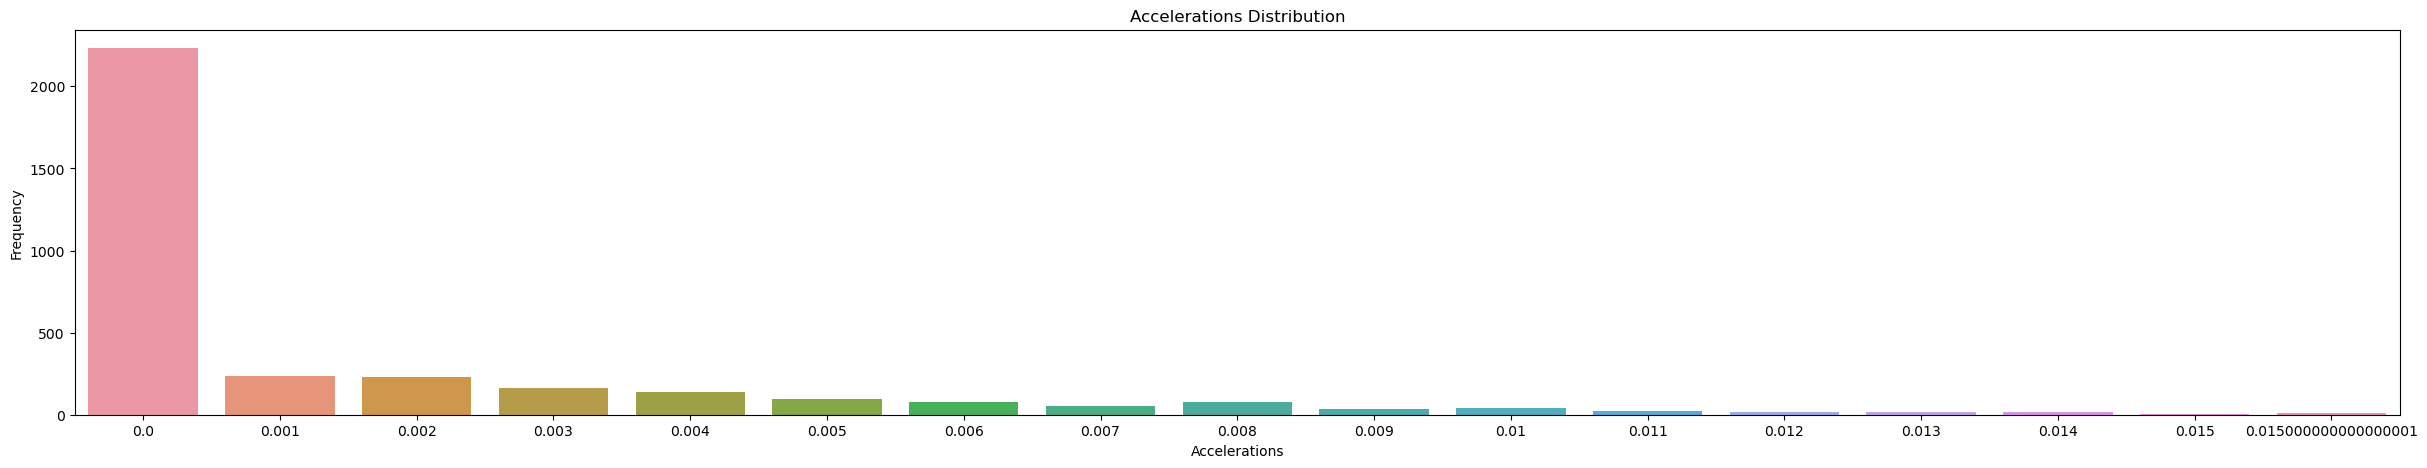

In [36]:
# 'accelerations' Bar Chart
plt.figure(figsize=(30, 5))
sns.countplot(data=oversampled_df, x='accelerations')
plt.title('Accelerations Distribution')
plt.xlabel('Accelerations')
plt.ylabel('Frequency')
plt.show()

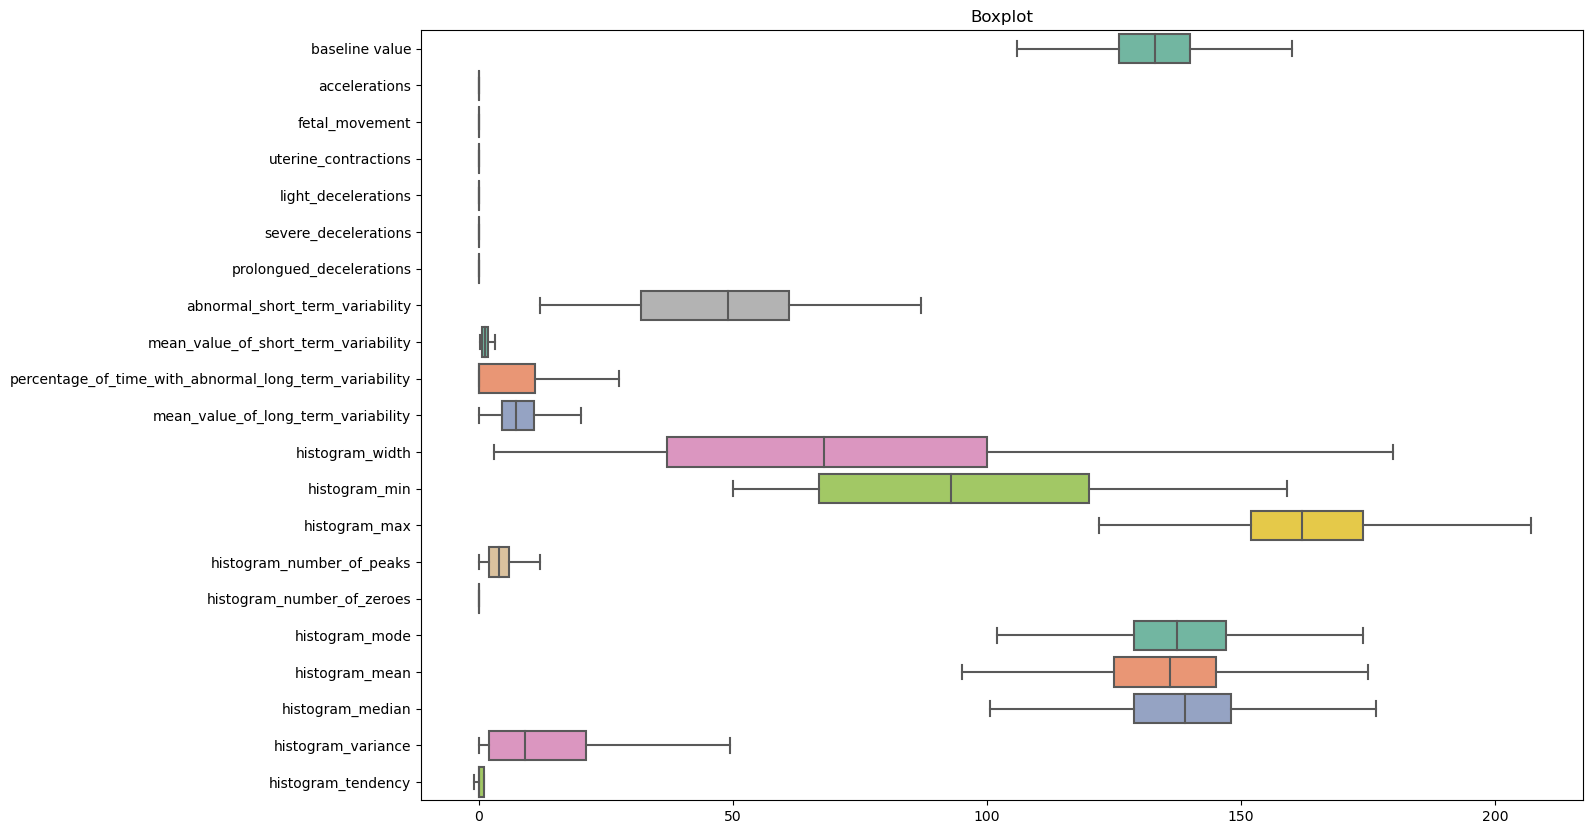

In [37]:
# Outliers
numerical_cols = oversampled_df.select_dtypes(include=['float64']).columns
numerical_cols = numerical_cols[numerical_cols != 'fetal_health']  # Menghapus kolom 'fetal_health'

plt.figure(figsize=(15, 10))
sns.boxplot(data=data_iqr[numerical_cols], orient='h', palette="Set2")
plt.title("Boxplot")
plt.show()

### Data Table

In [38]:
# Dataset After Cleaning
oversampled_df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,125.0,0.000,0.0075,0.000000,0.0000,0.0,0.0,68.0,0.3,27.5,...,120.0,128.0,0.0,0.0,125.0,125.0,126.0,0.000000,0.000000,3.0
1,143.0,0.006,0.0000,0.008000,0.0020,0.0,0.0,28.0,1.4,0.0,...,102.0,182.0,3.0,0.0,155.0,152.0,154.0,23.000000,0.000000,1.0
2,130.0,0.000,0.0000,0.004372,0.0070,0.0,0.0,37.0,1.8,0.0,...,58.0,148.0,4.0,0.0,127.0,121.0,126.0,21.000000,1.000000,1.0
3,129.0,0.000,0.0010,0.004372,0.0075,0.0,0.0,65.0,2.8,0.0,...,50.0,151.0,7.0,0.0,105.0,95.0,112.0,13.000000,0.319749,3.0
4,137.0,0.008,0.0010,0.005000,0.0030,0.0,0.0,58.0,1.6,0.0,...,69.0,178.0,5.0,0.0,148.0,143.0,151.0,49.500000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,133.0,0.000,0.0000,0.000000,0.0000,0.0,0.0,73.0,0.2,27.5,...,131.0,139.0,1.0,0.0,133.0,134.0,135.0,0.000000,0.000000,3.0
3461,130.0,0.000,0.0075,0.000000,0.0000,0.0,0.0,80.0,0.3,0.0,...,96.0,145.0,3.0,0.0,108.0,123.0,122.0,19.020899,0.319749,3.0
3462,123.0,0.000,0.0000,0.000000,0.0000,0.0,0.0,73.0,0.3,27.5,...,120.0,129.0,2.0,0.0,123.0,124.0,125.0,0.000000,0.000000,3.0
3463,133.0,0.000,0.0000,0.000000,0.0000,0.0,0.0,75.0,0.2,27.5,...,131.0,138.0,1.0,0.0,133.0,134.0,135.0,0.000000,0.000000,3.0


# 7.) Label Definition

In [39]:
# Define the Data Train
X_train = oversampled_df.drop("fetal_health",axis=1).values
y_train = oversampled_df['fetal_health']

# 8.) Model Building and Evaluation

In [40]:
# Model Initiation
nb = GaussianNB()
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

models = {
    "Naive Bayes": nb,
    "Random Forest": rf,
    "SVM": svm,
    "Logistic Regression": lr,
    "Decision Tree": dt
}

In [41]:
# Naive Bayes
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)
accuracy_nb = round(accuracy_score(y_test, nb_y_pred), 3)
print(confusion_matrix(y_test, nb_y_pred))

[[351  93  52]
 [  5  78   5]
 [  0  18  35]]


c:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [42]:
# Classification Report of Gaussian Naive Bayes Model
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

         1.0       0.99      0.71      0.82       496
         2.0       0.41      0.89      0.56        88
         3.0       0.38      0.66      0.48        53

    accuracy                           0.73       637
   macro avg       0.59      0.75      0.62       637
weighted avg       0.86      0.73      0.76       637



In [43]:
# Random Forest
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
accuracy_rf = round(accuracy_score(y_test, rf_y_pred), 3)
print(confusion_matrix(y_test, rf_y_pred))

[[475  21   0]
 [ 21  64   3]
 [  1  10  42]]


c:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [44]:
# Classification Report of Random Forest Model
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       496
         2.0       0.67      0.73      0.70        88
         3.0       0.93      0.79      0.86        53

    accuracy                           0.91       637
   macro avg       0.85      0.83      0.84       637
weighted avg       0.91      0.91      0.91       637



In [45]:
# SVM
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)
accuracy_svm = round(accuracy_score(y_test, svm_y_pred), 3)
print(confusion_matrix(y_test, svm_y_pred))

[[411  63  22]
 [ 15  71   2]
 [  0  14  39]]


c:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [46]:
# Classification Report of SVM Model
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.83      0.89       496
         2.0       0.48      0.81      0.60        88
         3.0       0.62      0.74      0.67        53

    accuracy                           0.82       637
   macro avg       0.69      0.79      0.72       637
weighted avg       0.87      0.82      0.83       637



In [47]:
# Logistic Regression
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
accuracy_lr = round(accuracy_score(y_test, lr_y_pred), 3)
print(confusion_matrix(y_test, lr_y_pred))

[[383  88  25]
 [ 22  59   7]
 [  0  12  41]]


c:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [48]:
# Classification Report of Logistic Regression Model
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

         1.0       0.95      0.77      0.85       496
         2.0       0.37      0.67      0.48        88
         3.0       0.56      0.77      0.65        53

    accuracy                           0.76       637
   macro avg       0.63      0.74      0.66       637
weighted avg       0.83      0.76      0.78       637



In [49]:
# Decision Tree
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
accuracy_dt = round(accuracy_score(y_test, dt_y_pred), 3)
print(confusion_matrix(y_test, dt_y_pred))

[[465  28   3]
 [ 22  61   5]
 [  4  11  38]]


c:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [50]:
# Classification Report of Decision Tree Model
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

         1.0       0.95      0.94      0.94       496
         2.0       0.61      0.69      0.65        88
         3.0       0.83      0.72      0.77        53

    accuracy                           0.89       637
   macro avg       0.79      0.78      0.79       637
weighted avg       0.89      0.89      0.89       637



# 9.) Model Comparison

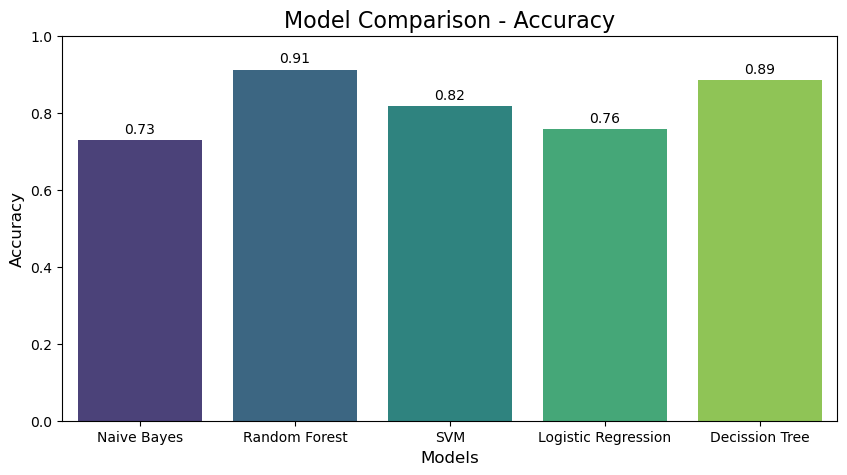

In [51]:
models = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression', 'Decission Tree']
accuracies = [
    accuracy_score(y_test, nb_y_pred),
    accuracy_score(y_test, rf_y_pred),
    accuracy_score(y_test, svm_y_pred),
    accuracy_score(y_test, lr_y_pred),
    accuracy_score(y_test, dt_y_pred)
]
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Model Comparison - Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 1)
plt.show()